# Binned Likelihood


In this notebook we will be using probfit together with iminuit to perform a Binned Likelihood fit.

probfit:
https://probfit.readthedocs.io/en/latest/

iMinuit:
https://iminuit.readthedocs.io/en/latest/index.html#

 

### Fit an exponential

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from math import exp, pi, sqrt
import probfit
from probfit import BinnedLH
from iminuit import Minuit, describe
from scipy.stats import norm, chi2, lognorm
import scipy.stats

In [2]:
# Generate data
# set the seed to always get the same samples
np.random.seed(seed=123456)

# Generate a toy dataset on an exponential distribution (background)
# pdf = lambda * exp(-lambda * x) ; scale = 1/lambda
data = scipy.stats.expon.rvs(loc= 100, scale = 25, size=10000)

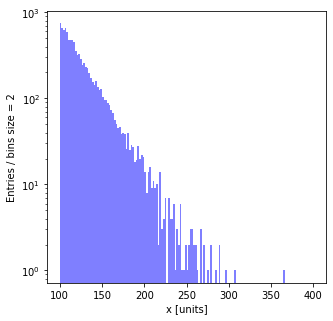

In [3]:
plt.figure(figsize=[5,5])
plt.subplot(111)
plt.hist(data, bins=150, range=[100,400], color='blue', alpha=0.5)
plt.xlabel(r'x [units]')
plt.ylabel(r'Entries / bins size = 2')
plt.yscale('log', nonposy='clip')

In [4]:
def exp_func(x, loc, scale):
    return scipy.stats.expon.pdf(x, loc, scale)

blh = BinnedLH(exp_func, data, bins=150, bound=(100,400))
describe(blh)

['loc', 'scale']

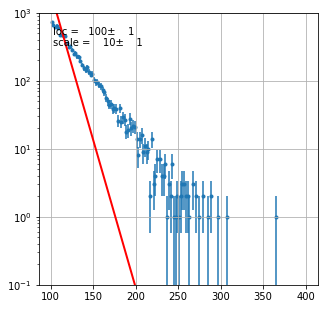

-------------------------------------------------------------------------------------------
|   | Name  |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-------------------------------------------------------------------------------------------
| 0 | loc   |   100.0   |    1.0    |            |            |         |         |       |
| 1 | scale |   10.0    |    1.0    |            |            |         |         |       |
-------------------------------------------------------------------------------------------

In [5]:
m = Minuit(blh, 
           loc=100, scale= 10,
           errordef=0.5,  #remember up is 0.5 for likelihood and 1 for chi^2
           pedantic=False)

# Show() is the same thing as draw(). But show the figure immediately.
# For all parameters and return vars:
#    https://probfit.readthedocs.io/en/latest/api.html#probfit.costfunc.UnbinnedLH.draw
plt.figure(figsize=[5,5])
plt.yscale('log', nonposy='clip')
plt.ylim([0.1,1000])
blh.show(m, print_par=True)
m.get_param_states()

/Users/mauro/anaconda3/envs/fits/lib/python3.7/site-packages/ipykernel_launcher.py:1: LogWarning: x is really small return 0
  """Entry point for launching an IPython kernel.


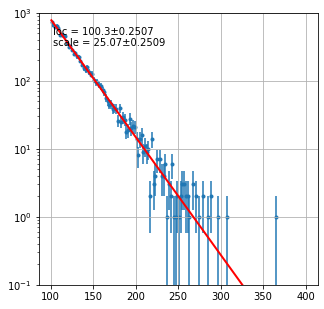

-------------------------------------------------------------------------------------------
|   | Name  |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-------------------------------------------------------------------------------------------
| 0 | loc   |  100.25   |   0.25    |            |            |         |         |       |
| 1 | scale |   25.07   |   0.25    |            |            |         |         |       |
-------------------------------------------------------------------------------------------

In [6]:
m.migrad()
plt.figure(figsize=[5,5])
plt.yscale('log', nonposy='clip')
plt.ylim([0.1,1000])
blh.show(m)
m.get_param_states()

In [7]:
m.minos()
m.get_param_states()

/Users/mauro/anaconda3/envs/fits/lib/python3.7/site-packages/ipykernel_launcher.py:1: LogWarning: x is really small return 0
  """Entry point for launching an IPython kernel.


-------------------------------------------------------------------------------------------
|   | Name  |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-------------------------------------------------------------------------------------------
| 0 | loc   |   100.25  |    0.25   |   -0.25    |    0.25    |         |         |       |
| 1 | scale |   25.07   |    0.25   |   -0.25    |    0.25    |         |         |       |
-------------------------------------------------------------------------------------------